# Analyzing the Cas9 guides used for random access

In [10]:
# Run on CPU not GPU
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns

import primo.tools.sequences as seqtools
from primo.models.simulator import Simulator

In [2]:
guides = [
    'CTCGCAGAGGTGGCGTCGACCAAGG',
    'CTCGCAGAGGTGGCGCGATTGTTGG',
    'CTCGCAGAGGTGGCGATAGCATAGG',
    'CTCGCAGAGGTGGCGTCGCCTTTGG',
    'CTCGCAGAGGTGGCGTGCCAACAGG',
    'CTCGCAGAGGTGGCGATCGCTCTGG',
    'CTCGCAGAGGTGGCGAGAACCGAGG',
    'CTCGCAGAGGTGGCGGACGAACTGG',
    'CTCGCAGAGGTGGCGCACAGAGAGG',
    'CTCGCAGAGGTGGCGCATTAAATGG',
    'CTCGCAGAGGTGGCGAGAATCTAGG',
    'CTCGCAGAGGTGGCGCTAGCTGTGG',
    'CTCGCAGAGGTGGCGCTTTACAAGG',
    'CTCGCAGAGGTGGCGAAGTGCTTGG',
    'CTCGCAGAGGTGGCGGGTTCCTAGG',
    'CTCGCAGAGGTGGCGTTTCCAGTGG',
    'CTCGCAGAGGTGGCGTGGGATGAGG',
    'CTCGCAGAGGTGGCGTAAACGCTGG',
    'CTCGCAGAGGTGGCGGATGAGAAGG',
    'CTCGCAGAGGTGGCGTCCTCAGTGG',
    'CTCGCAGAGGTGGCGGCCACATAGG',
    'CTCGCAGAGGTGGCGCCCATCCTGG',
    'CTCGCAGAGGTGGCGCCTGGTTAGG',
    'CTCGCAGAGGTGGCGTCCATCGTGG',
    'CTCGCAGAGGTGGCGGACCTTAAGG',
]

In [9]:
def collect_cas9_table(guides):
    """
    Given a list of sequences,
    Returns a dataframe where each guide's activation score is given when paired with every other guide
    """
    seq1 = []
    seq2 = []
    for g in guides:
        for g2 in guides:
            seq1.append(g)
            seq2.append(g2)
            
    df = pd.DataFrame({
        "target_features": seq1,
        "query_features": seq2
    })
        
    simulator = Simulator()
    activations = simulator.simulate(df)
    df['activations'] = activations
    
    return df 

df = collect_cas9_table(guides)

Text(42.0, 0.5, 'Guide')

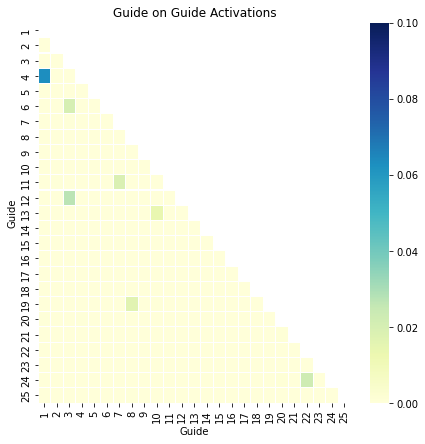

In [86]:
def get_activation_score(seq1, seq2):
    simulator = Simulator()
    df = pd.DataFrame({
        "target_features": [seq1],
        "query_features": [seq2]
    })
    return simulator.simulate(df)[0] # this is a float 

data = []
for s1 in guides:
    s1vs2 = []
    for s2 in guides:
        s1vs2.append(get_activation_score(s1, s2))
    data.append(s1vs2)
df = pd.DataFrame(data)

mask = np.zeros_like(df)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(7, 7))
ax = plt.axes() 
sns.heatmap(df, mask=mask, vmin = 0, vmax=.1,
                 xticklabels=[i + 1 for i in range(len(guides))], # to start count at 1
                 yticklabels=[i + 1 for i in range(len(guides))],
                 annot=False, linewidths=.1, cmap='YlGnBu') #cmap='flare' also good
plt.title('Guide on Guide Activations')
plt.xlabel('Guide')
plt.ylabel('Guide')

In [41]:
df.min()

0     0.0002
1     0.0002
2     0.0002
3     0.0002
4     0.0002
5     0.0002
6     0.0002
7     0.0002
8     0.0002
9     0.0002
10    0.0002
11    0.0002
12    0.0002
13    0.0002
14    0.0002
15    0.0002
16    0.0002
17    0.0002
18    0.0002
19    0.0002
20    0.0002
21    0.0002
22    0.0002
23    0.0002
24    0.0002
dtype: float64